# Data Preprocessing Tools

### Quick overview of Classes, Objects, and Methods
Class: A class is the model of something we want to build. For example, if we make a house construction plan that gathers the instructions on how to build a house, then this construction plan is the class.

Object: An object is an instance of the class. So if we take that same example of the house construction plan, then an object is simply a house. A house (the object) that was built by following the instructions of the construction plan (the class).
And therefore there can be many objects of the same class, because we can build many houses from the construction plan.

Method: A method is a tool we can use on the object to complete a specific action. So in this same example, a tool can be to open the main door of the house if a guest is coming. A method can also be seen as a function that is applied onto the object, takes some inputs (that were defined in the class) and returns some output.

## Importing the libraries

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [0]:
# Will import the data set and setup matrix of features(features are synonomous with independet variables)
# Features will usually be in the first columns to the left and the dependent variable vector on the far right
# Create matrix of features seperate from the dependent variable vector containing only last column of data
dataset = pd.read_csv('Data.csv')

# Take all the rows data and columns except the last column as a trick for any dataset for ML pre-processing (:-1 means all columns exluding last)
X = dataset.iloc[:,:-1].values

# Take the last column only and all its row data for the dependent variable vector
y = dataset.iloc[:,-1].values

In [0]:
# View the matrix of features
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [0]:
# View the vector of features
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking care of missing data

In [0]:
# Take care of the missing data (nan values can cause errors in ML model)
# You can simply delete the entire row or replace the missing value by the average of all the values in the column
# Replacing with the average of the entire row is a way to maintain enough data for the model if getting rid
# of the entire observation would reduce the dataset to a limited number of useful observations

# The class SimpleImputer from sklearn allow performing replacement of the nan values (note: google collaboratory automatically suggests modules/packages when you start to type)
from sklearn.impute import SimpleImputer

# you can choose to replace the values with the median, mean, mode, etc. but mean/avg is typically chosen
# the var imputer is an object that will get built based on the class instructions when the matrix is applied
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Need the methods fit and transform in order to complete the process
# Fit method connects imputer to matrix and looks for all missing values and computes average of column in the matrix but only looks at numerical values. 
# So we exclude the country string column (nornally include all numerial columns)

imputer.fit(X[:,1:3])

# But another method called transform is required to actually replace the missing values with the averages and return a new one
# The x[:,1:3] = is required because if not the transform will only return the 2 columns of numerical data as the new matrix
X[:,1:3] = imputer.transform(X[:,1:3])



In [0]:
# check the output for the new matrix of features
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding categorical data (aka creating numerical binary variables 0 or 1)

In [0]:
# This has to be done because the ML model cannot use category strings to create numerical correlcations.
# So strings have to be encoded or converted to numbers
# The strings cannot be simply numbered in order, because the model might interpret the order as significant
# For instance, if we simply label a column of something 0123456.... the model might think the first thing is more or less important
# So instead we create columns for each string category value that is given a binary or dummy variable 0 or 1 for each row


### Encoding the Independent Variable

In [0]:
# Note: In Google collaboratory, you get pop-up reminders to tell you exactly what the classes/methods do 
# and what their inputs are, it is similar to prompts someone would see in MS excel for formulas

# The encoder in this one is only being applied to index 0 since this is just for the string features
# If you do not apply the remainder = 'passthrough', you will only get a transformed output of the new binary columns 
# and lose the other columns


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[0])], remainder='passthrough')

# this time we only need one line of code because for this package there is a method that combines the fit/transform function
# The output of the transform method does not ouput a numpy array, so we must force this to happen 
# for the future model fit and training array requirement
X = np.array(ct.fit_transform(X))


In [0]:
# Check the output of the new array of features
# We now see three new binary columns that encode a new column for the three countries in the original single column
# Check the output to make sure that the binary columns represent the value correctly (in this case france was first and it is a 1)
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

In [0]:
# We will use the label encoder class for this one to encode the dependent variable 
from sklearn.preprocessing import LabelEncoder

# Since this is only one vector we do not need to enter anything in the encoder this time
le = LabelEncoder()

# Since this is just a single vector it does not have to be a numpy array as the previous one
y = le.fit_transform(y)

In [0]:
# Check the dependpent variable vector output
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the dataset into the Training set and Test set

In [0]:
# Train Test Split creates 4 sets( x train, x test, y train, y test)
# The future ML model expects to get all of these sets as inputs which is why they must be created

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 1)

In [0]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [0]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [0]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [0]:
print(y_test)

[0 1]


## Feature Scaling
Feature scaling must be applied AFTER the data is split into training and testing sets.
Feature scaling consists of scaling all the feature/variables to ensure they all take values in the same scale in order to make sure one feature or another does not dominate in the model due to different scales (which it would treat similar to weighting)

Now let me explain the why we have to apply feature scaling after splitting the data set into the training
set and instead it's really obvious it is for the simple reason that the test set is supposed to be
a brand new set on which you are going to evaluate your machine learning model.
So it's exactly like you know you're training your machinery moral on your training set and then later
on you know after it is trained you are going to deploy it on new observations.
So what this means is that the test set is something you're not supposed to work with for the training
and features killing is as you will see a technique that will get the mean and standard deviation of
your feature.
You know in order to perform the scaling.
So if we apply feature scaling before the split then it will actually get the mean and standard deviation
of all the values including the ones in the test set and since the test set is something you're not
supposed to have you know like some future data in production.
Well you know applying feature scaling on the original data before the split would cause some
what we call information leakage on the test set.
You know we would grab some information from the test set which we're not supposed to get because it
is supposed to be new data with new observations.
### So remember this the essential reason why you should not apply features scaling before the split is to prevent information leakage on the test set which you're not supposed to have until the training

### Not all ML models require feature scaling. It depends on the scales and type of model

In [0]:
# Two basic methods of feature scaling
# Standardization: x_stand = x-mean(x) / stand dev (x) (typically results in ~ -3:+3)
# Works well all the time usually so should use pretty much all the time

# Normalization: x_norm  = x-min(x) / max(x)-min(x) (results in values 0-1)
# Works well if features tend to follow normal distribution



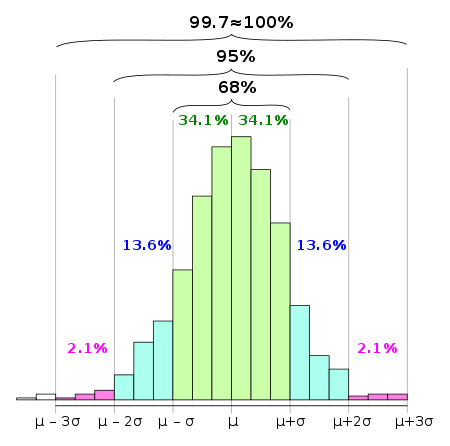![alt text](https://)

In [0]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# You do not have to apply scaling to the dummy variables given that they will fall into the range of standardized scaling
# You will also lose the proper binary interpreation if you apply feature scaling, as it will not be 0 or 1 as it should be

# Fit gets the mean and std dev of the features
# Transform actually applies the standardization formula to get the new x_stand values
# DO not use fit the second time as there would then be a new scalar being applied, causing incongruence between the train and test scalar
X_train[:, 3:] = sc.fit_transform(X_train[:,3:])
X_test[:, 3:] = sc.transform(X_test[:,3:])


In [0]:
print(X_train)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]


In [0]:
print(X_test)

[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
